In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.fft import fft
import time

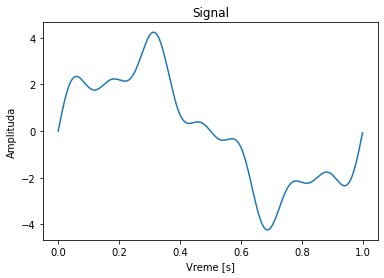

In [2]:
# stopa odabiranja
sr = 1000 # 10x vise nego ranije
# interval odabiranja
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.plot(t, x)
plt.title("Signal")
plt.xlabel("Vreme [s]")
plt.ylabel("Amplituda")
plt.show()

In [3]:
# Isto kao u proslim primerima
def DFT(x):
    """
    Funkcija koja racuna diskretnu Furijeovu transformaciju 1D realnog signala x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [4]:
start = time.time()
X1 = DFT(x)
print(round((time.time() - start) * 100000) / 100000, "sekundi")

0.09724 sekundi


In [5]:
start = time.time()
X2 = fft(x)
print(round((time.time() - start) * 100000) / 100000, "sekundi")

0.00047 sekundi


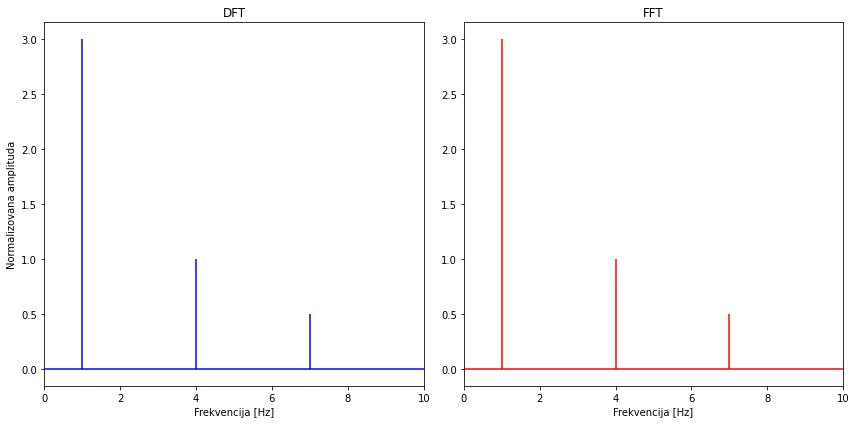

In [6]:
# racunanje frekvencija
N = len(X1)
n = np.arange(N)
T = N/sr
freq = n/T

n_oneside = N//2
# uzmimanje frekvencija za jednu stranu
f_oneside = freq[:n_oneside]

# normalizacija amplitude
X1_oneside =X1[:n_oneside]/n_oneside
X2_oneside =X2[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X1_oneside), linefmt='b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frekvencija [Hz]')
plt.ylabel('Normalizovana amplituda')
plt.xlim(0, 10)
plt.title("DFT")

plt.subplot(122)
plt.stem(f_oneside, abs(X2_oneside), linefmt='r', markerfmt=" ", basefmt="-r")
plt.xlabel('Frekvencija [Hz]')
plt.title("FFT")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()